In [1]:
# Python Project - Covid-19 Data Interpolation through numpy and pandas libraries

# Project members -
# 748 Satwik Devle
# Batch - G2
# Course Instructor - Jayvant Devare Sir


' \nDrive Link of Jupyter Notebook of the project - \nhttps://drive.google.com/file/d/12YAa69ohYar6OTJBtp-E7ZT96Jbk0Jva/view?usp=sharing\n'

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import plotly.express as px

In [3]:
country_df = pd.read_csv("covid_19_india.csv")
state_df = pd.read_csv("StatewiseTestingDetails.csv")
vaccine_df = pd.read_csv("covid_vaccine_statewise.csv")

In [4]:
country_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [5]:
state_df.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [6]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [7]:
#Copying the country_df data to cdf for easy reference
df = country_df.copy()

In [8]:
#lets convert the Date feature to Date&time datatype
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

#Time is not required as it doesnt make much difference
df.drop(['Time'],axis=1, inplace=True)

#Renaming State/UnionTerritory to States for easy reference
df.rename(columns={'State/UnionTerritory':'States'}, inplace=True)

In [9]:
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])
df['Discharge_Rate'] = np.round((df['Cured']/df['Confirmed'])*100, decimals = 4)      # create instances for 'death_rate and discharge_rate'
df['Death_Rate'] = np.round((df['Deaths']/df['Confirmed'])*100, decimals = 4)
df.head()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
0,1,2020-01-30,Kerala,1,0,0,0,1,1,0.0,0.0
1,2,2020-01-31,Kerala,1,0,0,0,1,1,0.0,0.0
2,3,2020-02-01,Kerala,2,0,0,0,2,2,0.0,0.0
3,4,2020-02-02,Kerala,3,0,0,0,3,3,0.0,0.0
4,5,2020-02-03,Kerala,3,0,0,0,3,3,0.0,0.0


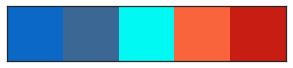

In [10]:
colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']
sns.set(palette=colors, style='white')

sns.palplot(colors)

In [11]:
#Current date from the record
current = df[df.Date == '2021-08-10']

In [12]:
#Sorting data in descending ordrer (Confirmed)
max_confirmed_cases = current.sort_values(by='Confirmed', ascending = False)
max_confirmed_cases.head()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
18058,18059,2021-08-10,Maharashtra,-,-,6151956,134064,6357833,71813,96.7618,2.1086
18054,18055,2021-08-10,Kerala,-,-,3377691,17852,3565574,170031,94.7306,0.5007
18053,18054,2021-08-10,Karnataka,-,-,2859552,36817,2919711,23342,97.9396,1.2610
18068,18069,2021-08-10,Tamil Nadu,-,-,2522470,34340,2577237,20427,97.8750,1.3324
18039,18040,2021-08-10,Andhra Pradesh,-,-,1950623,13549,1983721,19549,98.3315,0.6830


In [13]:
#Selecting top 10 States/U.T
top_cases = max_confirmed_cases[:10]
top_cases

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
18058,18059,2021-08-10,Maharashtra,-,-,6151956,134064,6357833,71813,96.7618,2.1086
18054,18055,2021-08-10,Kerala,-,-,3377691,17852,3565574,170031,94.7306,0.5007
18053,18054,2021-08-10,Karnataka,-,-,2859552,36817,2919711,23342,97.9396,1.2610
18068,18069,2021-08-10,Tamil Nadu,-,-,2522470,34340,2577237,20427,97.8750,1.3324
18039,18040,2021-08-10,Andhra Pradesh,-,-,1950623,13549,1983721,19549,98.3315,0.6830
18072,18073,2021-08-10,Uttar Pradesh,-,-,1685449,22774,1708793,570,98.6339,1.3328
18073,18074,2021-08-10,West Bengal,-,-,1505808,18240,1534360,10312,98.1392,1.1888
18046,18047,2021-08-10,Delhi,-,-,1411235,25067,1436800,498,98.2207,1.7446
18044,18045,2021-08-10,Chhattisgarh,-,-,988004,13540,1003244,1700,98.4809,1.3496
18063,18064,2021-08-10,Odisha,-,-,971391,6501,987956,10064,98.3233,0.6580


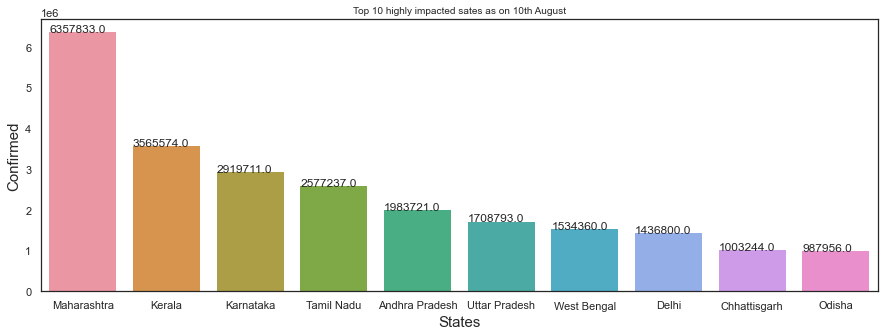

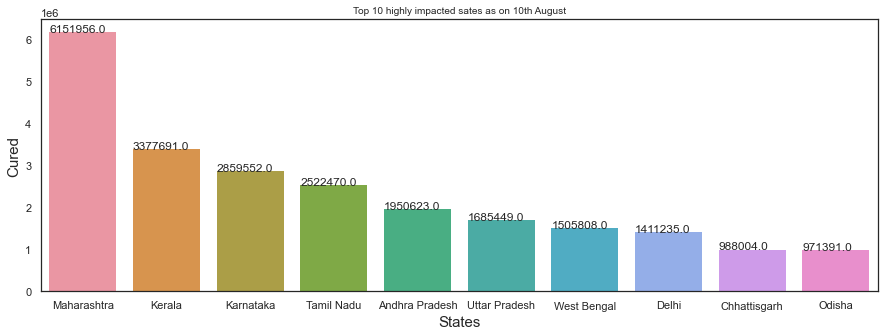

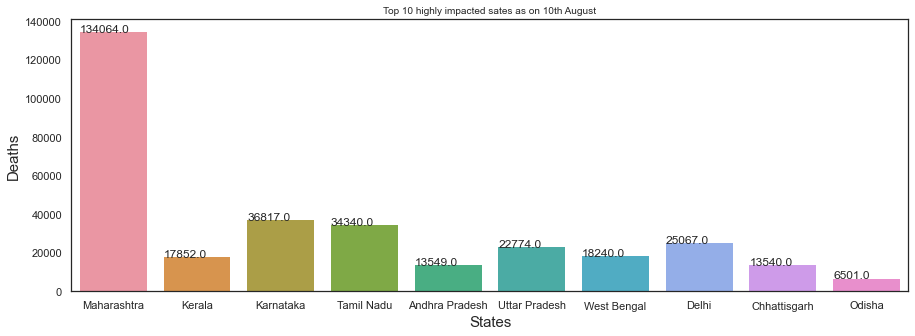

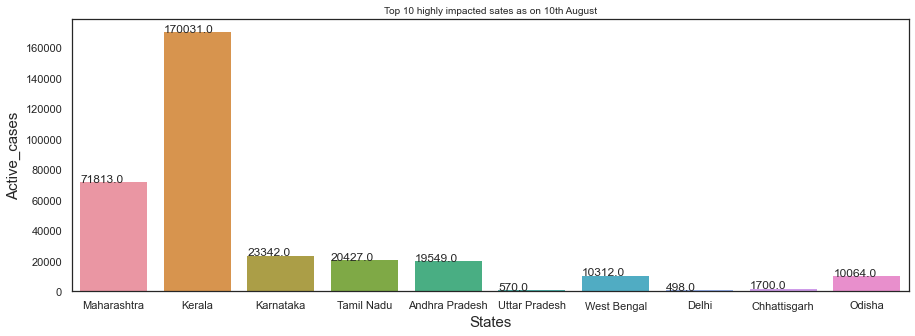

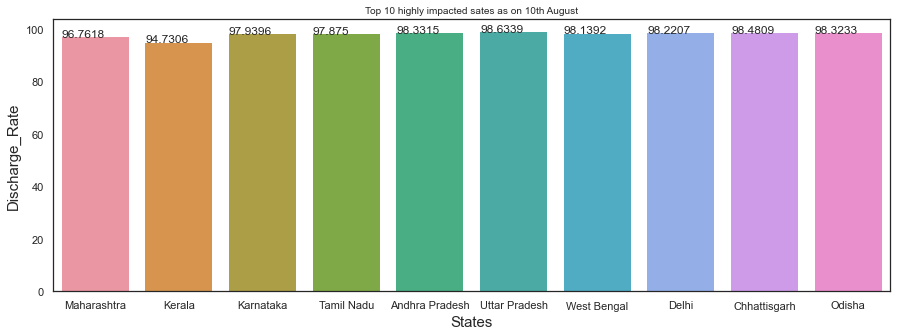

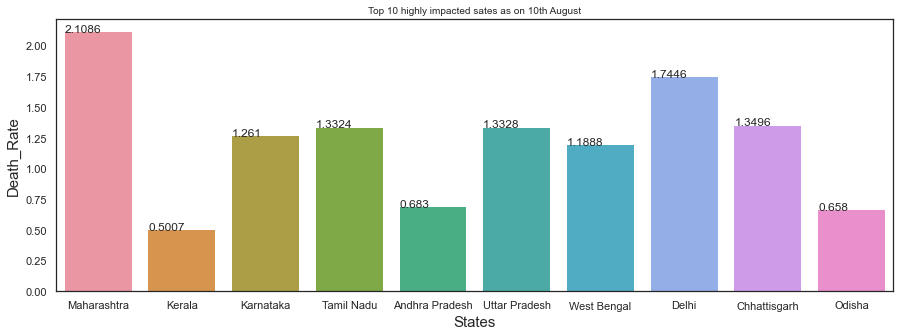

In [14]:
for feature in top_cases[['Confirmed','Cured','Deaths','Active_cases','Discharge_Rate','Death_Rate']]:
    fig=plt.figure(figsize=(15,5))
    plt.title("Top 10 highly impacted sates as on 10th August", size=10)
    ax=sns.barplot(data=top_cases,y=top_cases[feature],x='States', linewidth=0, edgecolor='black')
    plt.xlabel('States', size = 15)
    plt.ylabel(feature, size = 15)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())
plt.show()

In [15]:
df['Date']= pd.to_datetime(df['Date'])          # Date is converted to DateTime format.
data_21 = df[df['Date'].dt.year==2021]               # Considering data of only the year 2021.  

# Month is accessed from the DateTime object.
data_21['Month']=data_21['Date'].dt.month    

data_confirm_21= data_21['Confirmed'].groupby(data_21['Month']).sum()
data_dis_21= data_21['Cured'].groupby(data_21['Month']).sum()      # creating instances for 'confirmed','deaths','discharged' by month column
data_death_21= data_21['Deaths'].groupby(data_21['Month']).sum()

cols_21=[data_confirm_21,data_dis_21,data_death_21]
data_21=pd.concat(cols_21,axis=1) 

data_21['discharge_rate_21'] = np.round((data_21['Cured']/data_21['Confirmed'])*100, decimals=4)      # create instances for 'death_rate and discharge_rate'
data_21['death_rate_21'] = np.round((data_21['Deaths']/data_21['Confirmed'])*100, decimals=4)

<ipython-input-15-b319228a61f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_21['Month']=data_21['Date'].dt.month


In [16]:
data_21.reset_index(inplace=True)
data_21.head()

,Month,Confirmed,Cured,Deaths,discharge_rate_21,death_rate_21
0,1,326469747,315332019,4709167,96.5884,1.4425
1,2,305631803,297133802,4359434,97.2195,1.4264
2,3,356305616,342610397,4935253,96.1563,1.3851
3,4,440660671,384990190,5340298,87.3666,1.2119
4,5,751927486,645106765,8390917,85.7937,1.1159


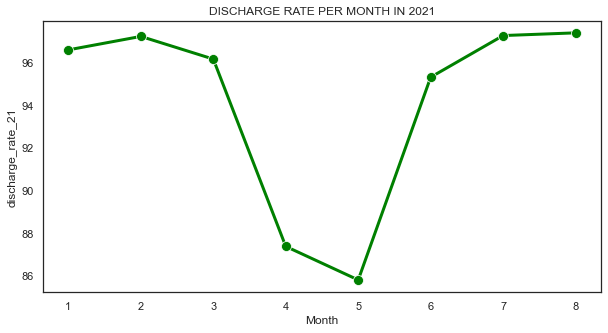

In [17]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="discharge_rate_21",data=data_21,color="g",lw=3,marker='o',markersize=10)
plt.title('DISCHARGE RATE PER MONTH IN 2021')
plt.show()

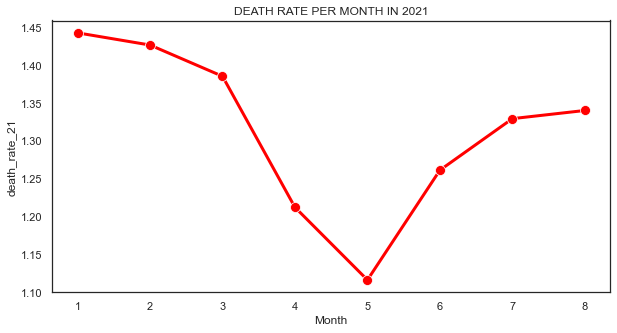

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="death_rate_21",data=data_21,color="r",lw=3,marker='o',markersize=10)
plt.title('DEATH RATE PER MONTH IN 2021')
plt.show()

In [19]:
vaccine_df

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
